# Import Required Libraries
Import libraries such as pandas, numpy, matplotlib, and seaborn for data analysis and visualization.

In [4]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from IPython.display import display

# Set visualization style
sns.set(style="whitegrid")
# Increase font size for better readability
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# Load Datasets
Load both JM1 and KC1 datasets from ARFF files and convert them to pandas DataFrames.

In [5]:
# Load Datasets
def load_arff_dataset(file_path):
    data, meta = arff.loadarff(file_path)
    df = pd.DataFrame(data)
    # Convert byte strings to regular strings
    for col in df.select_dtypes(["object"]):
        df[col] = df[col].str.decode("utf-8")
    # Rename target column to 'defects' for consistency
    if 'Defective' in df.columns:
        df = df.rename(columns={'Defective': 'defects'})
    elif 'label' in df.columns:
        df = df.rename(columns={'label': 'defects'})
    return df

# Load both datasets
jm1_path = "../data/raw/jm1.arff"
kc1_path = "../data/raw/kc1.arff"

try:
    jm1_df = load_arff_dataset(jm1_path)
    kc1_df = load_arff_dataset(kc1_path)
    
    print("JM1 Dataset Shape:", jm1_df.shape)
    print("KC1 Dataset Shape:", kc1_df.shape)
    print("\nJM1 Column Names:", jm1_df.columns.tolist())
    print("\nData Types (JM1):\n", jm1_df.dtypes)
    print("\nJM1 Target Values:\n", jm1_df['defects'].value_counts())
    print("\nKC1 Target Values:\n", kc1_df['defects'].value_counts())
    jm1_df.head()
except Exception as e:
    print(f"Error loading datasets: {str(e)}")

JM1 Dataset Shape: (7782, 22)
KC1 Dataset Shape: (1162, 22)

JM1 Column Names: ['LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS', 'CYCLOMATIC_COMPLEXITY', 'DESIGN_COMPLEXITY', 'ESSENTIAL_COMPLEXITY', 'LOC_EXECUTABLE', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'NUM_OPERANDS', 'NUM_OPERATORS', 'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'LOC_TOTAL', 'defects']

Data Types (JM1):
 LOC_BLANK                float64
BRANCH_COUNT             float64
LOC_CODE_AND_COMMENT     float64
LOC_COMMENTS             float64
CYCLOMATIC_COMPLEXITY    float64
DESIGN_COMPLEXITY        float64
ESSENTIAL_COMPLEXITY     float64
LOC_EXECUTABLE           float64
HALSTEAD_CONTENT         float64
HALSTEAD_DIFFICULTY      float64
HALSTEAD_EFFORT          float64
HALSTEAD_ERROR_EST       float64
HALSTEAD_LENGTH          float64
HALSTEAD_LEVEL           float64
HALSTEAD_PROG_T

# Analyze Class Distribution
Examine the distribution of defects in both datasets.

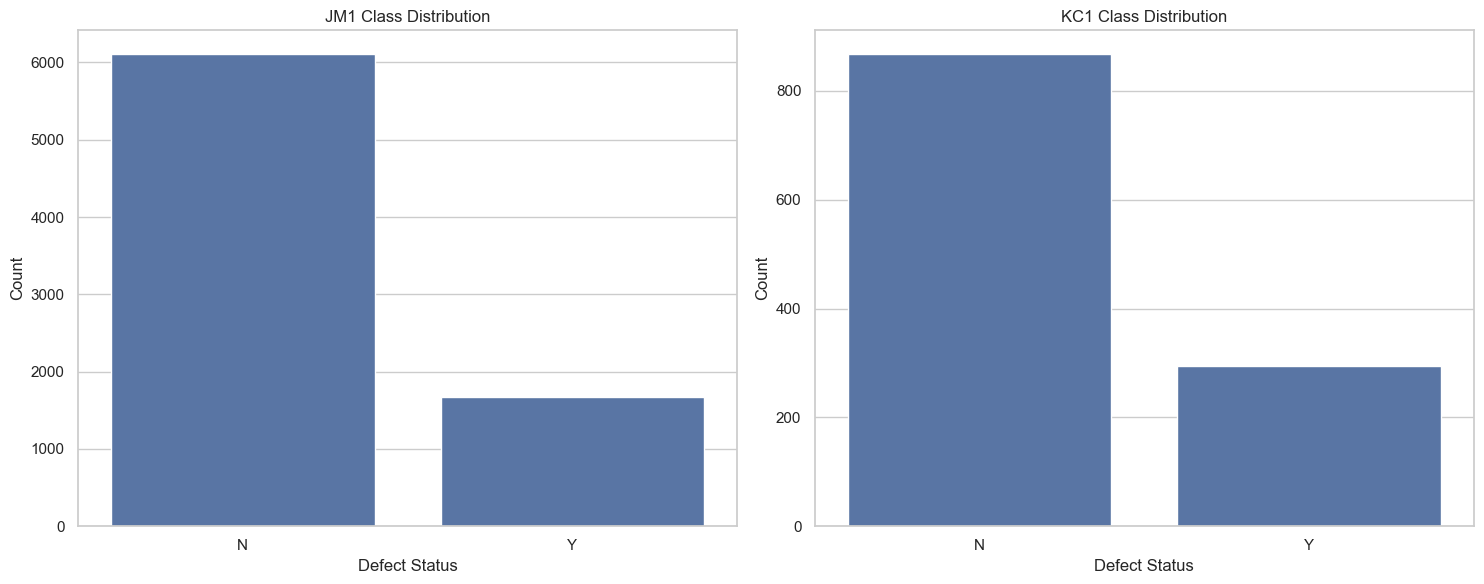

JM1 Class Distribution:
defects
N    78.5
Y    21.5
Name: proportion, dtype: float64 %

KC1 Class Distribution:
defects
N    74.7
Y    25.3
Name: proportion, dtype: float64 %


In [6]:
# Analyze Class Distributions for both datasets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# JM1 distribution
jm1_counts = jm1_df['defects'].value_counts()
sns.barplot(x=jm1_counts.index, y=jm1_counts.values, ax=ax1)
ax1.set_title("JM1 Class Distribution")
ax1.set_xlabel("Defect Status")
ax1.set_ylabel("Count")

# KC1 distribution
kc1_counts = kc1_df['defects'].value_counts()
sns.barplot(x=kc1_counts.index, y=kc1_counts.values, ax=ax2)
ax2.set_title("KC1 Class Distribution")
ax2.set_xlabel("Defect Status")
ax2.set_ylabel("Count")

plt.tight_layout()
plt.show()

# Print class distribution percentages
print("JM1 Class Distribution:")
print(jm1_df['defects'].value_counts(normalize=True).round(3) * 100, "%\n")
print("KC1 Class Distribution:")
print(kc1_df['defects'].value_counts(normalize=True).round(3) * 100, "%")

# Feature Distributions
Analyze the distributions of numerical features using histograms and KDE plots.

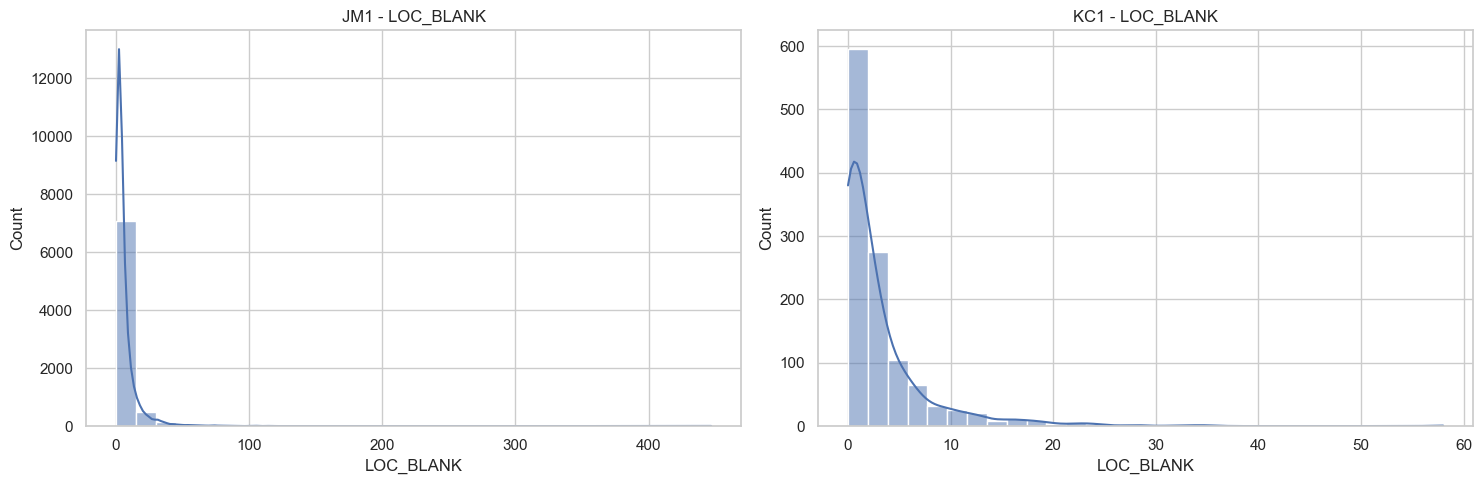

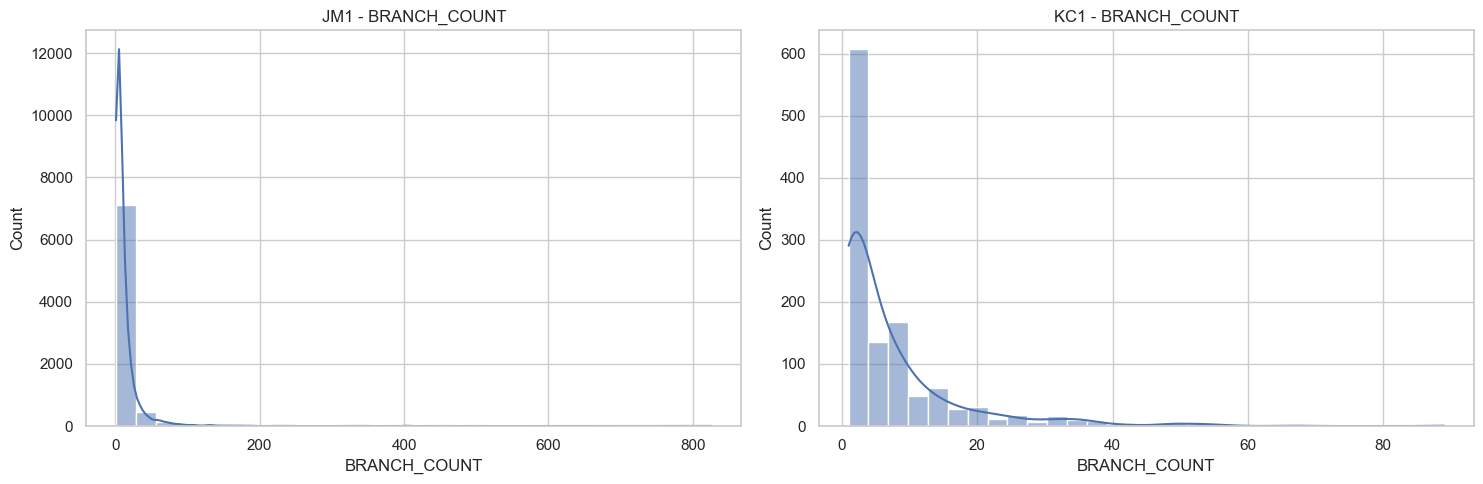

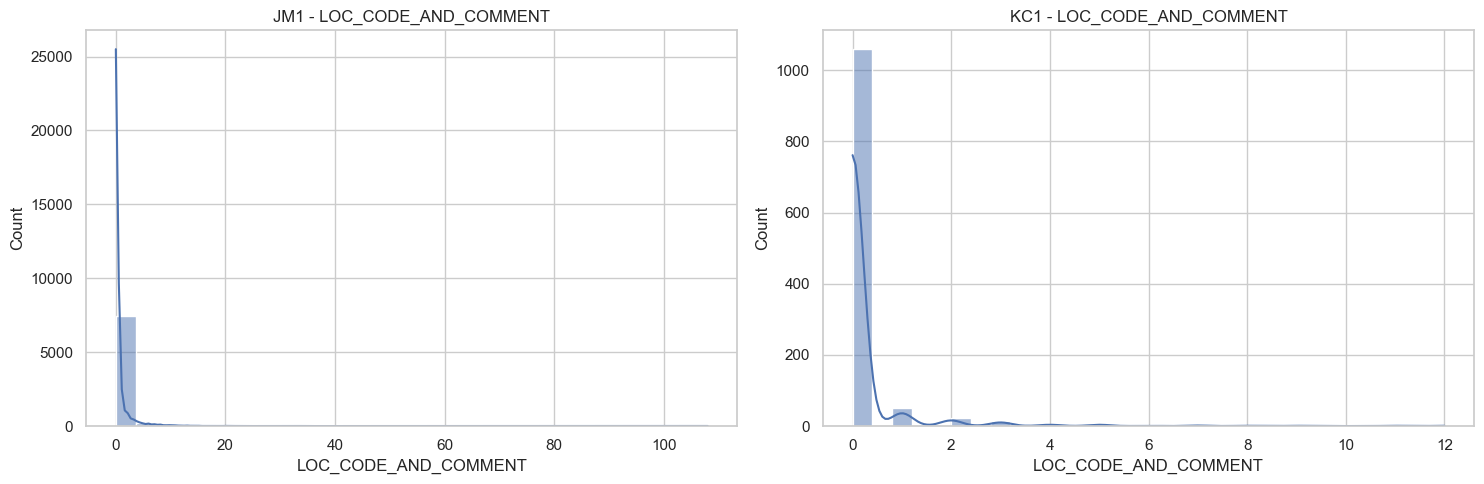

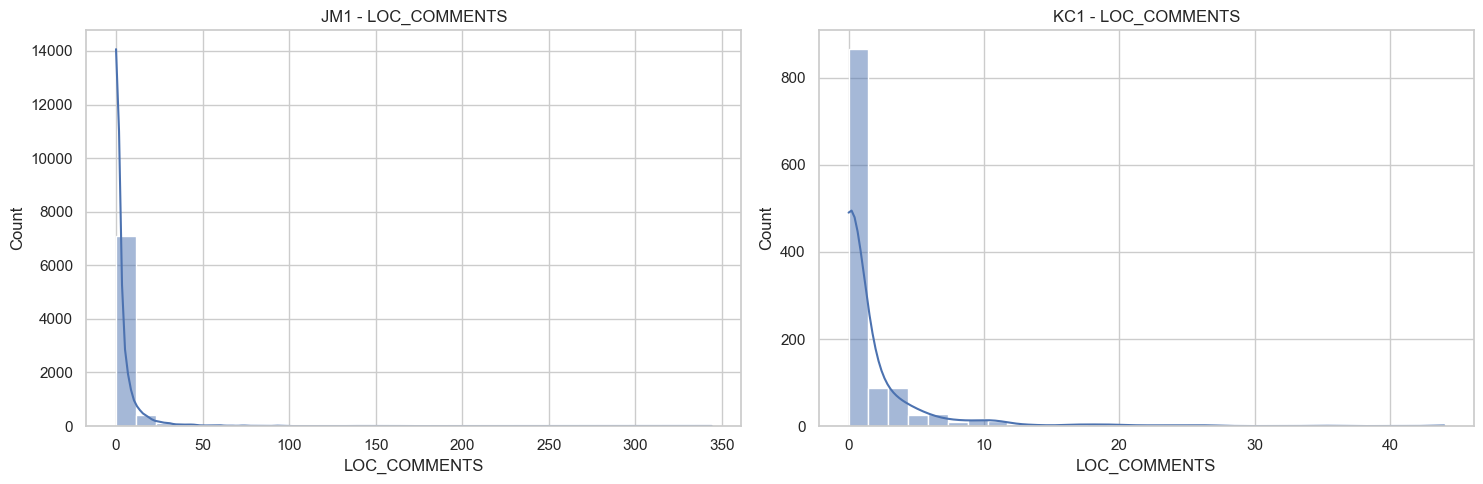

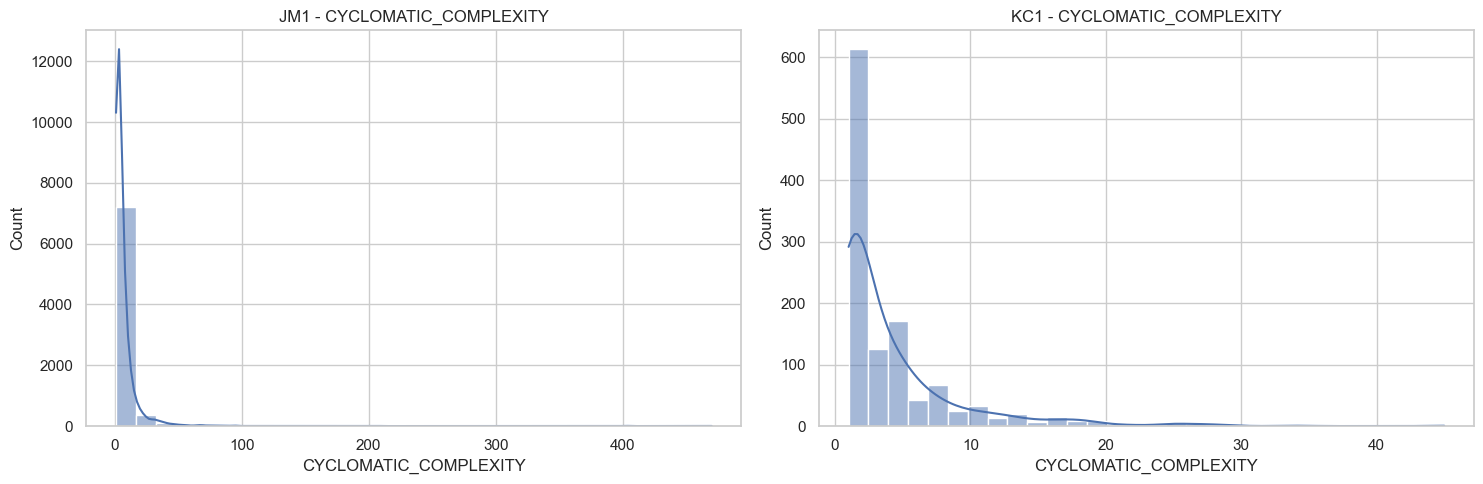

JM1 Dataset Statistics:
         LOC_BLANK  BRANCH_COUNT  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
count  7782.000000   7782.000000           7782.000000   7782.000000   
mean      6.036494     12.073246              0.493832      3.684143   
std      10.981517     23.933234              2.222237     10.373401   
min       0.000000      1.000000              0.000000      0.000000   
25%       1.000000      3.000000              0.000000      0.000000   
50%       3.000000      7.000000              0.000000      0.000000   
75%       7.000000     13.000000              0.000000      3.000000   
max     447.000000    826.000000            108.000000    344.000000   

       CYCLOMATIC_COMPLEXITY  
count            7782.000000  
mean                6.781933  
std                14.077881  
min                 1.000000  
25%                 2.000000  
50%                 4.000000  
75%                 7.000000  
max               470.000000  

KC1 Dataset Statistics:
         LOC_BLANK  BRA

In [7]:
# Select numerical features (exclude 'defects' column)
numerical_features = [col for col in jm1_df.columns if col != 'defects']

# Create a function to plot feature distributions
def plot_feature_distributions(feature, df1, df2, dataset1_name='JM1', dataset2_name='KC1'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot for first dataset
    sns.histplot(df1[feature], kde=True, bins=30, ax=ax1)
    ax1.set_title(f"{dataset1_name} - {feature}")
    
    # Plot for second dataset
    sns.histplot(df2[feature], kde=True, bins=30, ax=ax2)
    ax2.set_title(f"{dataset2_name} - {feature}")
    
    plt.tight_layout()
    plt.show()

# Plot distributions for each feature
for feature in numerical_features[:5]:  # Start with first 5 features
    plot_feature_distributions(feature, jm1_df, kc1_df)
    
# Print basic statistics
print("JM1 Dataset Statistics:")
print(jm1_df[numerical_features[:5]].describe())
print("\nKC1 Dataset Statistics:")
print(kc1_df[numerical_features[:5]].describe())

# Correlation Analysis
Generate and compare correlation matrices for both datasets.

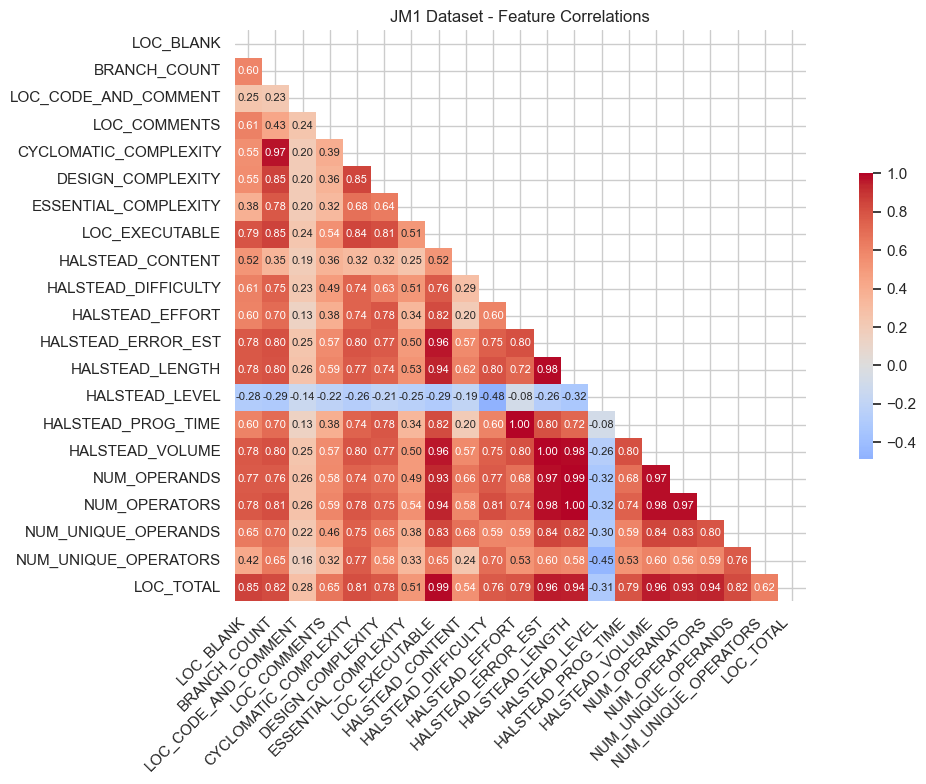

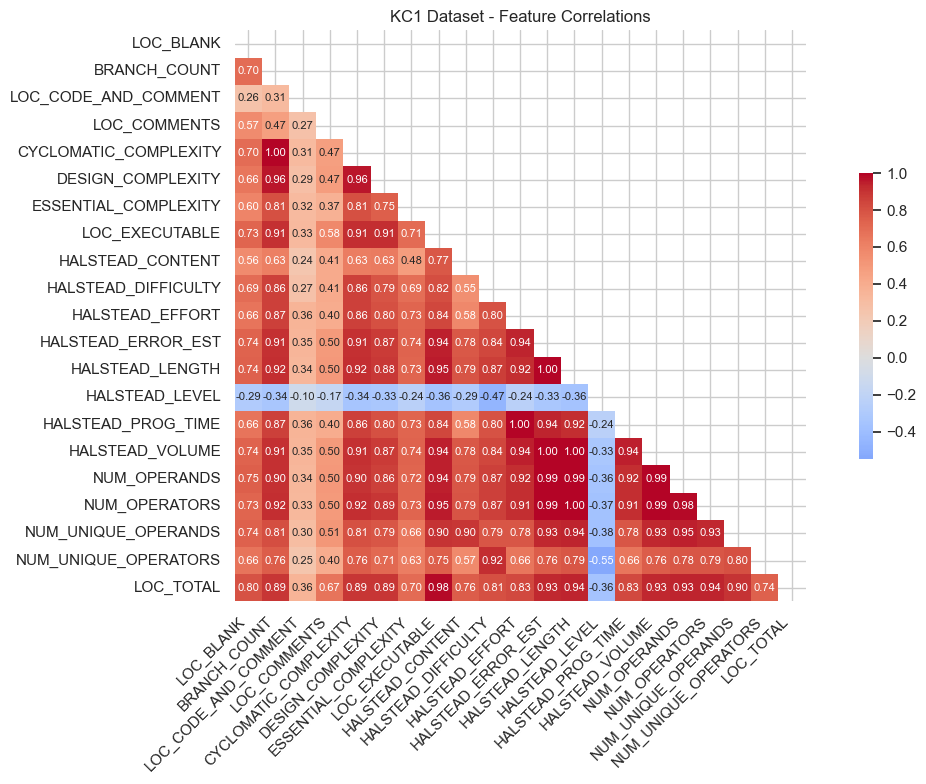

In [9]:
# Function to create correlation matrix plot
def plot_correlation_matrix(df, title):
    correlation_matrix = df[numerical_features].corr()
    
    plt.figure(figsize=(12, 8))
    mask = np.triu(np.ones_like(correlation_matrix))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
               cmap='coolwarm', center=0, square=True, cbar_kws={"shrink": .5},
               annot_kws={'size': 8})
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Plot correlation matrices
plot_correlation_matrix(jm1_df, "JM1 Dataset - Feature Correlations")
plot_correlation_matrix(kc1_df, "KC1 Dataset - Feature Correlations")

# Feature Importance Analysis
Analyze feature importance using mutual information scores.

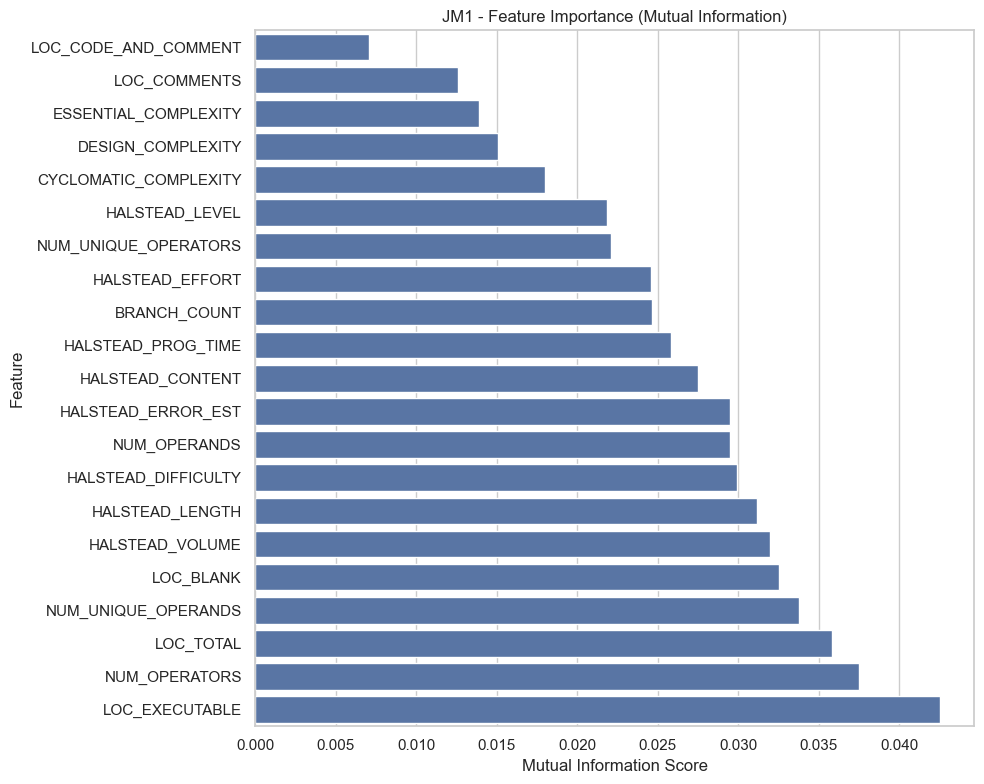

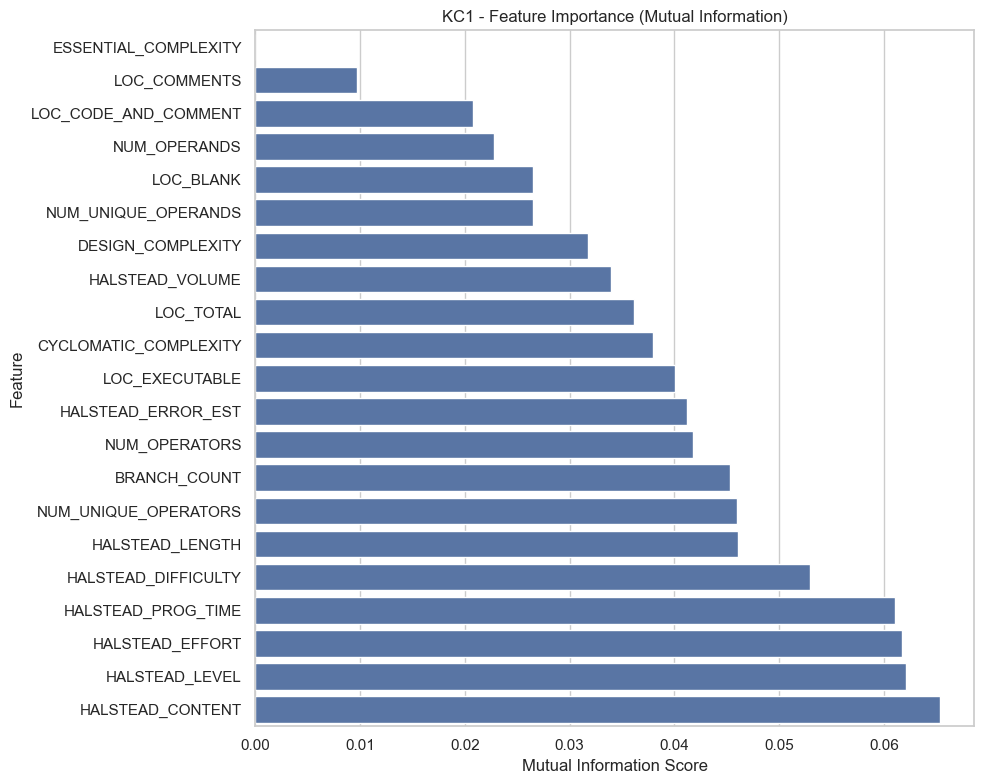

Top 5 Most Important Features - JM1:
                Feature  Importance
0             LOC_BLANK    0.032536
18  NUM_UNIQUE_OPERANDS    0.033787
20            LOC_TOTAL    0.035828
17        NUM_OPERATORS    0.037502
7        LOC_EXECUTABLE    0.042521

Top 5 Most Important Features - KC1:
                Feature  Importance
9   HALSTEAD_DIFFICULTY    0.052940
14   HALSTEAD_PROG_TIME    0.061080
10      HALSTEAD_EFFORT    0.061746
13       HALSTEAD_LEVEL    0.062062
8      HALSTEAD_CONTENT    0.065323


In [10]:
from sklearn.feature_selection import mutual_info_classif

def plot_feature_importance(df, dataset_name):
    # Calculate mutual information scores
    mi_scores = mutual_info_classif(df[numerical_features], df['defects'])
    importance_df = pd.DataFrame({'Feature': numerical_features, 'Importance': mi_scores})
    importance_df = importance_df.sort_values('Importance', ascending=True)
    
    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(data=importance_df, y='Feature', x='Importance')
    plt.title(f"{dataset_name} - Feature Importance (Mutual Information)")
    plt.xlabel("Mutual Information Score")
    plt.tight_layout()
    plt.show()
    
    return importance_df

# Plot feature importance for both datasets
jm1_importance = plot_feature_importance(jm1_df, "JM1")
kc1_importance = plot_feature_importance(kc1_df, "KC1")

# Print top 5 most important features for each dataset
print("Top 5 Most Important Features - JM1:")
print(jm1_importance.tail())
print("\nTop 5 Most Important Features - KC1:")
print(kc1_importance.tail())